<a href="https://colab.research.google.com/github/Ylja07/Advanced-machine-learning/blob/main/week_4_Laplace_approximation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt
from numpy import random

In [13]:

#reused code for reading data

#for pereptron learning
#sigmoid function


alpha = 0.01
xin = []
with open('x.ext') as my_file:
    for line in my_file:
        xin.append(line.split())
del xin[-2:]
# xin.pop()
# xin.pop()
print(xin)
xin = np.array(xin)
print(xin)


tin = []
with open('t.ext') as my_file:
    for line in my_file:
      tin.append((line.split()))
          

    

del tin[-1:]

print(tin)
tin = np.array(tin)
tin=tin.astype(float)
xin=xin.astype(float)

print(np.dot(xin.T,tin))


#p_densPerceptron
def p_dens(w,y):
  E = objectivePerceptron(w,y)
  return np.exp(-E)


def ylearnget(w):
   a=np.dot(xin,w)
   return sigmoid(a)

# gradient and objective for perceptron learning (note )
def gradientPerceptron(w,y):
  a=np.dot(xin,w) # w is the input , x is from x.ext (we compute the probability of the parameters w)
  y=sigmoid(a) #sigmoid function (outpuds)
  e=tin-y # error between given output patterns t (t.ext) and y
  g=-x.T*e #gradient
  gM = alpha*w+g  #learning rule w+= alpha (learning rate) * gradient
  return gM


def objectivePerceptron(w,y): #objective function
  G= - (tin.T * np.log(y)+(1-tin.T)*np.log(1-y)) #y was computed in gradientPerceptron , t from t.ext
  EW= np.dot(w.T,w) / 2 #total of w^2
  M= G + alpha * EW  #value of objective funcition (measure of error)
  return M




[['1', '2', '3'], ['1', '3', '2'], ['1', '3', '6'], ['1', '5.5', '4.5'], ['1', '5', '3'], ['1', '7', '4'], ['1', '5', '6'], ['1', '8', '6'], ['1', '9.5', '5'], ['1', '9', '7']]
[['1' '2' '3']
 ['1' '3' '2']
 ['1' '3' '6']
 ['1' '5.5' '4.5']
 ['1' '5' '3']
 ['1' '7' '4']
 ['1' '5' '6']
 ['1' '8' '6']
 ['1' '9.5' '5']
 ['1' '9' '7']]
[['0'], ['0'], ['0'], ['0'], ['0'], ['1'], ['1'], ['1'], ['1'], ['1']]
[[ 5. ]
 [38.5]
 [28. ]]


In [14]:
#find perceptron solution
#ax1 + by1 + c >0 , ax2+by2 +c <=0

rate=0.1


w=np.array([0,0])
w2=np.append(w,0)
tlabels=tin.T[0]




for i in range(5000):
  haddiff=False #check if there is still a incorrect weight 

  # for all data points
  for j in range(tlabels.size):
  

    # compute the difference from the desired output and current output
    out2= xin[j] @ w2
    out3=(out2 > 0).astype(int)
    diff=tlabels[j]-out3
    if(diff != 0):
      haddiff=True


    # update the weights realtive to the "error" they cause
    deltaw = diff * xin[j]
    neww2=w2+deltaw*rate
    w2=neww2
  if(not haddiff):
    break


print(neww2)





[-15.8    2.15   0.85]


(10, 3)


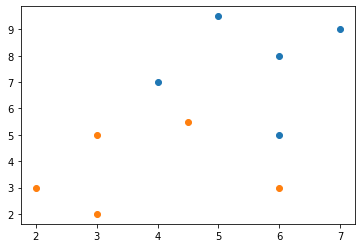

In [15]:
#organize and plot data 
print(xin.shape)

#separate the 2 coordinates
xcor=np.delete(xin,0,1)
xcor1=np.delete(xcor,0,1)
xcor2=np.delete(xcor,1,1)


#seperate the lists based on labels
X1L1=[]
X2L1=[]
X1L2=[]
X2L2=[]

i=-1
for t in tin:
  i+=1
  t=t[0]
  if t:
    X1L1.append(xcor1[i])
    X2L1.append(xcor2[i])
  else:
    X1L2.append(xcor1[i])
    X2L2.append(xcor2[i])



#plt.scatter(xcor1,xcor2)
plt.scatter(X1L1,X2L1)
plt.scatter(X1L2,X2L2)

x = w
y = np.linspace(-1, 1, 300)

# plt.plot(y,laplaceApprox(y))


[2.15 0.85]
[[2.  3. ]
 [3.  2. ]
 [3.  6. ]
 [5.5 4.5]
 [5.  3. ]
 [7.  4. ]
 [5.  6. ]
 [8.  6. ]
 [9.5 5. ]
 [9.  7. ]]
[-8.95  -7.65  -4.25  -0.15  -2.5    2.65   0.05   6.5    8.875  9.5  ]
[[18.7830992  16.76198157]
 [16.76198157 16.20895571]]
[[1.3745075389943288e-07, 1.5337419964277467e-07, 1.7955985011692142e-07, 2.1994365958050358e-07, 2.807824965111507e-07, 3.7181221364601284e-07, 5.080013373880224e-07, 7.121445417708841e-07, 1.0186088102602086e-06, 1.4786111468566854e-06, 2.1674569820952476e-06, 3.1941868705441787e-06, 4.714048958713203e-06, 6.944122619697545e-06, 1.0182258757078203e-05, 1.4829279491116809e-05, 2.1414110967292276e-05, 3.062123465852196e-05, 4.3319567435477406e-05, 6.0591651777085404e-05, 8.376188233712667e-05, 0.00011442243154079279, 0.00015445557096818976, 0.00020605121128698903, 0.0002717186860735325, 0.00035429206226891813, 0.0004569285477465585, 0.0005830998605521312, 0.0007365767039191027, 0.0009214067399087437, 0.0011418866614971086, 0.001402529122308

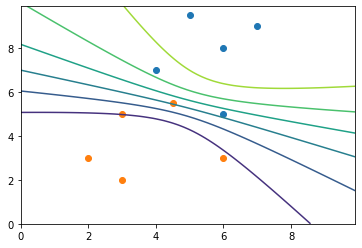

In [16]:
#the graph to reproduce:
# the second graph represents 2 labels (stars and squares, and the locations are the coordinates x_i (vector of lenght 2) corresponding to label t_i 
# the line is the linear seperation line, the dotted lines represent the distribution of the solution i.e. p(t=1)


#return sigmoid
def sigmoid(x):
  return 1/(1+np.exp(-x))


#a* (denoted a in code) and s2 are the expectation and variance of a=(w*x) (w is gaussian, x is the new datapoint)

#we compute a,s2 from the data x combined with the posterior over y,  a=w* x , s2 = x.t V(w) x

# P(t =1 | x, D, a)
def laplaceApprox(a,s2=0):
  k=1/((1+np.pi*(s2)/8)**0.5)
  return sigmoid(k*a)


#test w (estimated soltuion for w)
w=np.array([1,1])
wconst=-10.5 #the first element of the weight (a constant)


#w obtained from algorithm below!
w=np.array([neww2[1],neww2[2]])
wconst=neww2[0]









#calculation of H to get V=H^-1
#(note using the data x here, for xVx we will use the NEW data point x)

print(w)
print(xcor)
h=np.dot(w,xcor.T)+wconst #!!!adding the constant 
print(h)

sigmoids=sigmoid(h)*sigmoid(-h)
xcross=np.dot(xcor.T,xcor)

xcort=xcor.T

xcor4=np.expand_dims(xcor, axis=1)
xcor3=np.expand_dims(xcor, axis=2)


xcrs=np.dot(xcor3,xcor4)


#need to take diagonal
xterms=np.diagonal(xcrs,axis1=0,axis2=2)

#transpose to put the u dimension in front
xterms=xterms.T

sigmoids=np.expand_dims(sigmoids,axis=1)
sigmoids=np.expand_dims(sigmoids,axis=1)
sigxterm=np.multiply(xterms,sigmoids)


#here is where there should also be a +alpha*deltafunction
hessian=sum(sigxterm)
print(hessian)

H=hessian


#using this hessian we can compute a,s2 from x and w*
def geta(w,x):
  return np.dot(w,x)+wconst#!!!adding the constant

  #H is the hessian computed from w* and the data
def gets2(H,x):
  return np.dot(x,np.dot(np.linalg.inv(H),x))

def newpointapprox(x):
  a=geta(w,x)
  s2=gets2(H,x)
  return laplaceApprox(a,s2)




#plotting the approximation
gridcount=100
gridscale=10
xrange=np.array(range(gridcount))*(gridscale/gridcount)
yrange=np.array(range(gridcount))*(gridscale/gridcount)



pvalues=[]
for xv in xrange:
  xvals=[]
  for yv in yrange:
    xvals.append(newpointapprox([xv,yv]))
  pvalues.append(xvals)
print(pvalues)
# x = np.linspace(0, 1, 5)

# y = np.linspace(0, 1, 5)

# xv, yv = np.meshgrid(x, y)

plt.contour(xrange,yrange,pvalues)

plt.scatter(X1L1,X2L1)
plt.scatter(X1L2,X2L2)
